In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Model

In [9]:
cd drive/

[Errno 2] No such file or directory: 'drive/'
/content/drive


[link text](https://)

In [10]:
cd MyDrive/

/content/drive/MyDrive


In [11]:
cd Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [12]:
ls

 ANN.ipynb   cat.jpg   CNN.ipynb  'Copy of CNN.ipynb'   dog.jpg   DS/   val/


img_width, img_haight= 150, 150
train_data_dir= "DS"
test_data_dir= "val"

In [15]:
img_width, img_height= 150,150
train_data_dir= "DS"
test_data_dir= "val"


In [16]:
train_data_agum= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
val_data_agum= ImageDataGenerator(rescale=1./255)


In [17]:
train_generator= train_data_agum.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=5,
    class_mode="binary"
)
validation_generator= val_data_agum.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=5,
    class_mode="binary"
)


Found 160 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [22]:
classifier = Sequential()
classifier.add(Conv2D(32, (3,3), input_shape= (150,150,3), activation= "relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3), activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dense(units=1, activation="sigmoid"))

In [23]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history= classifier.fit_generator(train_generator, epochs=10, validation_data=validation_generator)

<ipython-input-23-68cbac525857>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= classifier.fit_generator(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
32/32 [==============================] - 88s 3s/step - loss: 0.7855 - accuracy: 0.5063 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 11s 336ms/step - loss: 0.7020 - accuracy: 0.5375 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 8s 248ms/step - loss: 0.7063 - accuracy: 0.4812 - val_loss: 0.6921 - val_accuracy: 0.5417
Epoch 4/10
32/32 [==============================] - 16s 453ms/step - loss: 0.6921 - accuracy: 0.5188 - val_loss: 0.6903 - val_accuracy: 0.5417
Epoch 5/10
32/32 [==============================] - 14s 439ms/step - loss: 0.6889 - accuracy: 0.5375 - val_loss: 0.6665 - val_accuracy: 0.5417
Epoch 6/10
32/32 [==============================] - 14s 435ms/step - loss: 0.6756 - accuracy: 0.6375 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 11s 325ms/step - loss: 0.6761 - accuracy: 0.5750 - val_loss: 0.6651 - val_accuracy: 0.5833
Epo

(150, 150, 3)
1/1 [==============================] - 0s 55ms/step
[[0.9549559]] cat


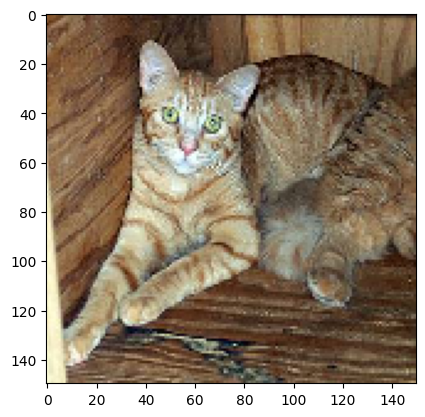

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
img_w, img_h= 150,150
img= keras.utils.load_img("cat.jpg", target_size= (img_w, img_h))
plt.imshow(img)
img= keras.utils.img_to_array(img)
print(img.shape)
x= np.expand_dims(img,axis=0)
score= classifier.predict(x)
print(score, 'cat'if score>.5 else'dog')